In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle

In [ ]:
raw_data = pd.read_csv('Existing_Base.csv')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [ ]:
targets=raw_data['Revenue Grid']
features=raw_data.drop(['Revenue Grid'], axis=1)

In [ ]:
features_train, features_val, target_train, target_val = train_test_split(
    features, targets, test_size=0.2, random_state=42, stratify=targets)

In [ ]:
features_train.reset_index(drop=True, inplace=True)
features_val.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)
target_val.reset_index(drop=True, inplace=True)

In [ ]:
features_train.shape, features_val.shape, target_train.shape, target_val.shape

((8124, 31), (2031, 31), (8124,), (2031,))

In [ ]:
target_val.value_counts(normalize=True)

2    0.893156
1    0.106844
Name: Revenue Grid, dtype: float64

##Data exploration


In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [ ]:
features_train['children'].nunique()
features_train['children'].value_counts()

Zero    4991
1       1473
2       1277
3        368
4+        15
Name: children, dtype: int64

In [ ]:
uniq_values = features_train['children'].unique()
print(uniq_values)

['2' '1' '3' 'Zero' '4+']


In [ ]:
train_uniq_values = {}

def children_numeric_converter(children_data, unique_values):
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
  children_data[children_data=='4+'] = 4    # Converts 4+ to 4
  children_data = pd.to_numeric(children_data) # Converts children_data to numeric
  return children_data


features_train['children'].nunique()

features_train['children'].value_counts()

uniq_values = features_train['children'].unique()

children_numeric = children_numeric_converter(features_train['children'], uniq_values)

features_train.drop(['children'], axis=1, inplace=True) ### drops the children column

features_train['children'] = children_numeric

train_uniq_values['children'] = uniq_values.tolist()

<ipython-input-87-ac33f4a49943>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
<ipython-input-87-ac33f4a49943>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
<ipython-input-87-ac33f4a49943>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children

In [ ]:
#features_train['post_code'].nunique()
#features_train['post_area'].nunique()

columns_remove=[]


features_train.drop(['post_code', 'post_area', 'REF_NO'], axis=1, inplace=True)
columns_remove.extend(['post_code', 'post_area', 'REF_NO'])

In [ ]:
features_train.head()

,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,children
0,31-35,Partner,Housewife,Other,Own Home,">=35,000",No,No,1988,Granada,...,0.00,8.99,0.0,Female,North West,31.88,8.90,16.65,53.28,2
1,31-35,Partner,Housewife,Professional,Own Home,"<30,000, >=27,500",No,No,1995,Carlton,...,5.98,7.98,0.0,Female,South East,69.21,23.05,46.74,127.76,1
2,31-35,Partner,Housewife,Professional,Own Home,"<27,500, >=25,000",No,No,1987,Ulster,...,4.99,0.00,0.0,Female,Northern Ireland,24.68,6.74,18.90,62.98,2
3,51-55,Partner,Housewife,Professional,Own Home,">=35,000",No,Yes,1982,Central,...,0.00,0.00,0.0,Female,West Midlands,0.00,18.66,18.66,48.14,1
4,26-30,Partner,Other,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1988,Granada,...,0.00,0.00,0.0,Female,North West,38.58,20.07,52.21,132.89,3


In [ ]:
features_train['age_band'].nunique()

13

In [ ]:
features_train['age_band'].value_counts()

45-50      1095
36-40       921
41-45       886
55-60       851
51-55       845
31-35       831
26-30       742
61-65       681
65-70       482
22-25       367
71+         327
18-21        53
Unknown      43
Name: age_band, dtype: int64

In [ ]:
def ageband_numeric_converter(ageband_data, uniq_values):

  def __split(x):
    splits = x.split('-')
    left_val = splits[0]
    right_val = splits[1]
    mean = (float(left_val) + float(right_val))/2
    return mean

  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
  ageband_data[ageband_data=='71+'] = '71-75'
  ageband_data[ageband_data=='Unknown'] = '45-50'
  mean_vals = ageband_data.apply(__split)
  return mean_vals


features_train['age_band'].nunique()

features_train['age_band']. value_counts()

ageband_unique = features_train['age_band'].unique()

numeric_age_band = ageband_numeric_converter(features_train['age_band'], ageband_unique)

features_train.drop(['age_band'], axis=1)

features_train['age_band'] = numeric_age_band

train_uniq_values['age_band'] = ageband_unique.tolist()

<ipython-input-92-55a4bd3bb36e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
<ipython-input-92-55a4bd3bb36e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[ageband_data=='71+'] = '71-75'
<ipython-input-92-55a4bd3bb36e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[ageband_data=='Unknown'] = '45-50'


In [ ]:
features_train['gender'].value_counts()

Female     6122
Male       1975
Unknown      27
Name: gender, dtype: int64

In [ ]:
def gender_numeric_converter(gender_data, uniq_values):
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
  gender_data[gender_data=='Unknown'] = 'Female'
  gender_data[gender_data=='Male'] = 0
  gender_data[gender_data=='Female'] = 1
  gender_data = pd.to_numeric(gender_data)
  return gender_data

gender_uniq = features_train['gender'].unique()

gender_numeric = gender_numeric_converter(features_train['gender'], gender_uniq)

features_train.drop(['gender'], axis=1, inplace=True)

features_train['gender'] = gender_numeric

train_uniq_values['gender'] = gender_uniq.tolist()

<ipython-input-94-0953923cf2b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
<ipython-input-94-0953923cf2b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[gender_data=='Unknown'] = 'Female'
<ipython-input-94-0953923cf2b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[gender_data=='Male'] = 0
<ipython-input-94-0953923cf2b2>:5: SettingWithCopyWarni

In [ ]:
missing_value_replacement = {}
missing_value_replacement['status'] = ['Partner']
missing_value_replacement['occupation'] = ['Professional']
missing_value_replacement['occupation_partner'] = ['Unknown', 'Professional']
missing_value_replacement['home_status'] = ['Own Home']
missing_value_replacement['self_employed'] = ["No"]
missing_value_replacement['self_employed_partner'] = ["No"]
missing_value_replacement['TVarea'] = ["Central", "Carlton", "Meridian"]
missing_value_replacement['region'] = ["South East"]
missing_value_replacement['family_income'] = [">=35,000"]
missing_value_replacement['Average Credit Card Transaction'] = [0.0]
missing_value_replacement['Balance Transfer'] = [16.975]
missing_value_replacement['Life Insurance'] = [30.0]
missing_value_replacement['Medical Insurance'] = [0.0]
missing_value_replacement['Average A/C Balance'] = [15.00]
missing_value_replacement['Personal Loan'] = [0.0]
missing_value_replacement['Investment in Mutual Fund'] = [23.47]
missing_value_replacement['Investment Tax Saving Bond'] = [0.0]
missing_value_replacement['Home Loan'] = [0.0]
missing_value_replacement['Online Purchase Amount'] = [0.0]
missing_value_replacement['Investment in Commudity'] = [23.79]
missing_value_replacement['Investment in Equity'] = [12.82]
missing_value_replacement['Investment in Derivative'] = [20.89]
missing_value_replacement['Portfolio Balance'] = [65.38]

In [ ]:
####### Finding replacement values for the other columns #######
features_train.describe()

,age_band,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,children,gender
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,46.533050,1968.430822,23.536013,45.848500,26.857107,64.896397,18.816137,31.832499,25.705244,41.928358,6.055491,4.401269,19.354365,35.991018,21.546958,31.539849,89.368669,0.638971,0.756893
std,13.511666,179.942993,51.008213,79.870499,53.022363,94.681534,32.094002,45.166539,88.237940,64.665153,12.737090,9.809771,93.045927,42.117391,32.826080,39.877961,108.716211,0.916030,0.428985
min,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.230000,0.000000,0.000000
25%,38.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000,4.500000,8.500000,26.375000,0.000000,1.000000
50%,47.500000,1988.000000,0.000000,16.975000,0.000000,30.000000,0.010000,14.990000,0.000000,23.470000,0.000000,0.000000,0.000000,23.790000,12.820000,20.895000,65.385000,0.000000,1.000000
75%,57.500000,1994.000000,23.980000,64.970000,34.490000,92.932500,26.970000,45.952500,20.980000,59.460000,5.490000,4.490000,7.980000,50.127500,27.962500,42.392500,125.015000,1.000000,1.000000
max,73.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.270000,138.560000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,4.000000,1.000000


In [ ]:
##### Analysing the Status column ######

one_hot_converted_columns = ['status', 'occupation', 'occupation_partner', 'home_status', 'self_employed', 'self_employed_partner', 'TVarea', 'region', 'family_income']

encoder = OneHotEncoder()

encoder.fit(features_train[one_hot_converted_columns])

encoded_data = pd.DataFrame(encoder.transform(features_train[one_hot_converted_columns]).toarray())

encoded_data.columns = encoder.get_feature_names_out()

features_train.drop(one_hot_converted_columns, axis=1, inplace=True)

features_train = pd.concat([features_train, encoded_data], axis=1)

In [ ]:
##### Analysing the year last moved column #####
columns_remove.append('year_last_moved')
features_train.drop(['year_last_moved'], axis=1, inplace=True)


In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age_band                              8124 non-null   float64
 1   Average Credit Card Transaction       8124 non-null   float64
 2   Balance Transfer                      8124 non-null   float64
 3   Term Deposit                          8124 non-null   float64
 4   Life Insurance                        8124 non-null   float64
 5   Medical Insurance                     8124 non-null   float64
 6   Average A/C Balance                   8124 non-null   float64
 7   Personal Loan                         8124 non-null   float64
 8   Investment in Mutual Fund             8124 non-null   float64
 9   Investment Tax Saving Bond            8124 non-null   float64
 10  Home Loan                             8124 non-null   float64
 11  Online Purchase A

In [ ]:
with open('column_sequence.pickle', 'wb') as f:
  pickle.dump(list(features_train.columns), f)

In [ ]:
###### We need to keep in mind that missing values could be present in the validation and Testing set

### Store the names of the columns we removed
### Store the unique values in the columns
### Store the onehot encoder object

with open('columns_to_remove.pickle', 'wb') as f:
  pickle.dump(columns_remove, f)

with open('column_unique_values.pickle', 'wb') as f:
  pickle.dump(train_uniq_values, f)

with open('column_encoder.pickle', 'wb') as f:
  pickle.dump(encoder, f)

with open('missing_value_replacement.pickle', 'wb') as f:
  pickle.dump(missing_value_replacement, f)

In [ ]:
####### Validation set preprocessing ##########

#### Load the required files

with open('column_encoder.pickle', 'rb') as f:
  encoder = pickle.load(f)

with open('column_unique_values.pickle', 'rb') as f:
  uniq_values = pickle.load(f)

with open('columns_to_remove.pickle', 'rb') as f:
  cols_to_remove = pickle.load(f)

with open('missing_value_replacement.pickle', 'rb') as f:
  missing_replacement = pickle.load(f)

with open('column_sequence.pickle', 'rb') as f:
  column_seq = pickle.load(f)


### Initialize the required predefined functions

def children_numeric_converter(children_data, unique_values):
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
  children_data[children_data=='4+'] = 4    # Converts 4+ to 4
  children_data = pd.to_numeric(children_data) # Converts children_data to numeric
  return children_data

def ageband_numeric_converter(ageband_data, uniq_values):

  def __split(x):
    splits = x.split('-')
    left_val = splits[0]
    right_val = splits[1]
    mean = (float(left_val) + float(right_val))/2
    return mean

  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
  ageband_data[ageband_data=='71+'] = '71-75'
  ageband_data[ageband_data=='Unknown'] = '45-50'
  mean_vals = ageband_data.apply(__split)
  return mean_vals

def gender_numeric_converter(gender_data, uniq_values):
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
  gender_data[gender_data=='Unknown'] = 'Female'
  gender_data[gender_data=='Male'] = 0
  gender_data[gender_data=='Female'] = 1
  gender_data = pd.to_numeric(gender_data)
  return gender_data


### Preprocessing function

def preprocess_val_test(data):
  ### Drop columns ####
  for column in cols_to_remove:
    data.drop([column], axis=1, inplace=True)

  children_uniq = uniq_values['children']
  children_numeric = children_numeric_converter(data['children'], children_uniq)
  data.drop(['children'], axis=1, inplace=True)
  data['children'] = children_numeric

  ageband_uniq = uniq_values['age_band']
  ageband_numeric = ageband_numeric_converter(data['age_band'], ageband_uniq)
  data.drop(['age_band'], axis=1, inplace=True)
  data['age_band'] = ageband_numeric

  gender_uniq = uniq_values['gender']
  gender_numeric = gender_numeric_converter(data['gender'], gender_uniq)
  data.drop(['gender'], axis=1, inplace=True)
  data['gender'] = gender_numeric

  ### Missing value Imputation ######
  missing_value_columns = list(data.isnull().sum()[data.isnull().sum()>0].index)

  for column in missing_value_columns:
    replacement_values = missing_replacement[column]
    if len(replacement_values) != 1:
      replace_with = np.random.choice(replacement_values, data[column].isnull().sum())
    else:
      replace_with = replacement_values[0]
    data[data[column].isnull(), column] = replace_with


  #### One hot encoding ######
  one_hot_converted_columns = ['status', 'occupation', 'occupation_partner', 'home_status', 'self_employed', 'self_employed_partner', 'TVarea', 'region', 'family_income']
  encoded_data = pd.DataFrame(encoder.transform(data[one_hot_converted_columns]).toarray())
  encoded_data.columns = encoder.get_feature_names_out()
  data.drop(one_hot_converted_columns, axis=1, inplace=True)
  data = pd.concat([data, encoded_data], axis=1)

  ### Ensure that the column ordering and the columns are same #####
  data = data[column_seq]

  return data

In [ ]:
features_val = preprocess_val_test(features_val)

<ipython-input-102-6ad48e9d83b9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
<ipython-input-102-6ad48e9d83b9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
<ipython-input-102-6ad48e9d83b9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[ch

In [ ]:
features_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age_band                              2031 non-null   float64
 1   Average Credit Card Transaction       2031 non-null   float64
 2   Balance Transfer                      2031 non-null   float64
 3   Term Deposit                          2031 non-null   float64
 4   Life Insurance                        2031 non-null   float64
 5   Medical Insurance                     2031 non-null   float64
 6   Average A/C Balance                   2031 non-null   float64
 7   Personal Loan                         2031 non-null   float64
 8   Investment in Mutual Fund             2031 non-null   float64
 9   Investment Tax Saving Bond            2031 non-null   float64
 10  Home Loan                             2031 non-null   float64
 11  Online Purchase A

In [ ]:
## Class 2 are low revenue customers and class 1 are high revenue customers
## We see that there exists a class imbalance
## Class Imbalance is a problem (90% are 2 and 10% are 1)

target_train.value_counts()

target_train[target_train==2] = 0
target_train[target_train==1] = 1

target_val[target_val==2] = 0
target_val[target_val==1] = 1

In [ ]:
###### Simplest algorithm that comes to mind -  Logistic regression , KNN

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, solver="newton-cg", class_weight={0:1.1, 1:3})

lr.fit(features_train, target_train) ### Model training happens

LogisticRegression(class_weight={0: 1.1, 1: 3}, max_iter=1000,
                   solver='newton-cg')

In [ ]:
##### Model prediction here ######

tr_pred = lr.predict(features_train) #### Training prediction
val_pred = lr.predict(features_val)

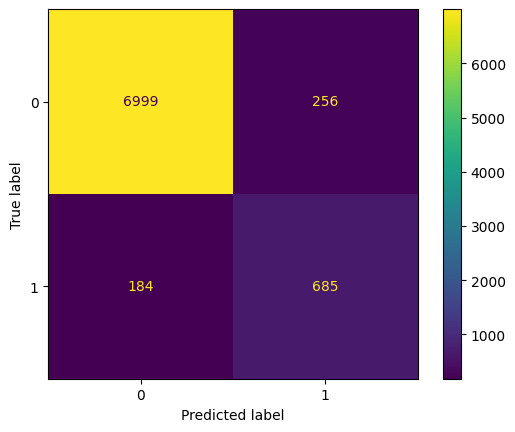

In [ ]:
##### Models performance

from sklearn.metrics import ConfusionMatrixDisplay, f1_score

ConfusionMatrixDisplay.from_predictions(target_train, tr_pred)

In [ ]:
train_f1 = f1_score(target_train, tr_pred)
val_f1 = f1_score(target_val, val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

#### Looking at the Train and Val F1 scores, we can safely say that the Logistic regression is an underfit model

Train F1 Score - 0.7569060773480664
Val F1 Score - 0.7024608501118568


In [ ]:
##### Random Forest #########

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10,
                             n_estimators=1000,
                             class_weight={0:1.2, 1:4},
                             min_samples_split=70,
                             min_samples_leaf=1)

clf.fit(features_train, target_train)

RandomForestClassifier(class_weight={0: 1.2, 1: 4}, max_depth=10,
                       min_samples_split=70, n_estimators=1000)

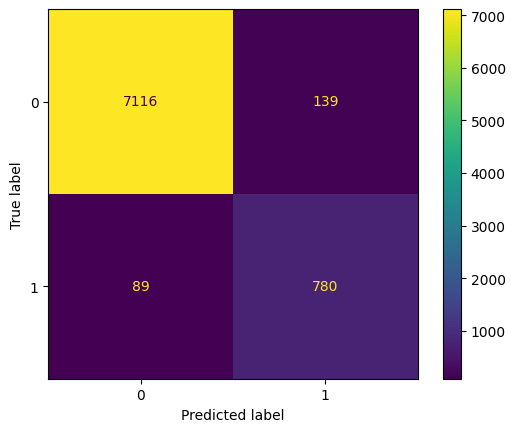

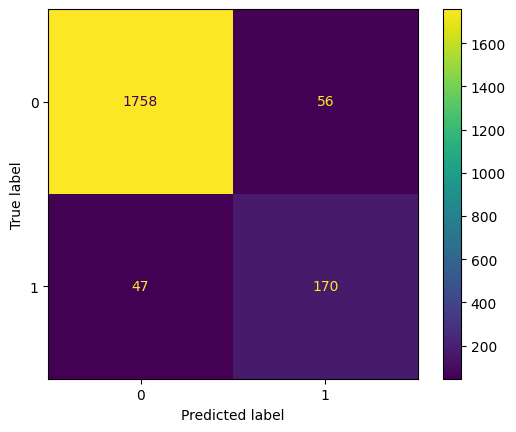

In [ ]:
tr_pred = clf.predict(features_train) #### Training prediction
val_pred = clf.predict(features_val)

ConfusionMatrixDisplay.from_predictions(target_train, tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val, val_pred)


In [ ]:
train_f1 = f1_score(target_train, tr_pred)
val_f1 = f1_score(target_val, val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

Train F1 Score - 0.87248322147651
Val F1 Score - 0.7674943566591422
